<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/IMDB_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [0]:
from tensorflow.keras.datasets import imdb

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
X_train =vectorize_sequences(train_data)
X_test =vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
######## Building validation set

In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
## Building the model

In [0]:
model = models.Sequential()

#model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=512,validation_data=(X_val,y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.5577 - acc: 0.7827 - val_loss: 0.4341 - val_acc: 0.8478
Epoch 2/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.3444 - acc: 0.8957 - val_loss: 0.3289 - val_acc: 0.8817
Epoch 3/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.2532 - acc: 0.9202 - val_loss: 0.2879 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.2015 - acc: 0.9368 - val_loss: 0.2799 - val_acc: 0.8875
Epoch 5/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.1644 - acc: 0.9484 - val_loss: 0.2890 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 1s 79us/sample - loss:

In [0]:
### Plotting the loss

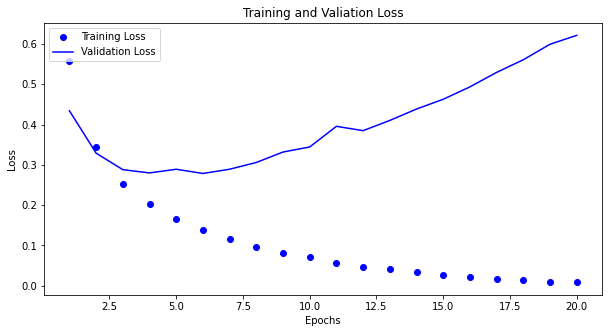

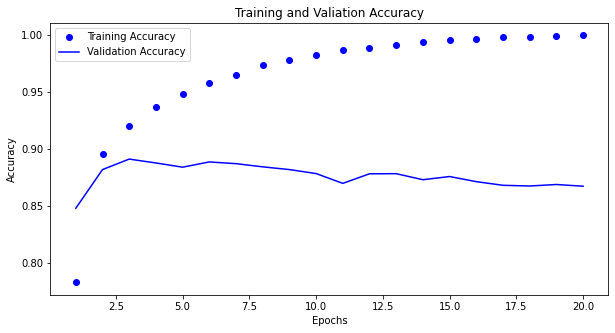

In [0]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(history_dict['acc'])+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,loss_values,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and Valiation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs,acc_values,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation Accuracy')
plt.title('Training and Valiation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
### Train a new network for fewer epochs

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )

NameError: ignored

In [0]:
results ## accuracy is close to 90%

[0.30131962613582614, 0.87788]

In [0]:
## predictions

In [0]:
predictions = model.predict(X_test)

In [0]:
predictions ## We notet that the model is quite unsure about some values

array([[0.24131685],
       [0.99725616],
       [0.7154983 ],
       ...,
       [0.07417205],
       [0.10795751],
       [0.4952873 ]], dtype=float32)

In [0]:
###### We add regularizers

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [0]:
model = Sequential()
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),
                activation = 'relu'))
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=512,validation_data=(X_val,y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.5650 - acc: 0.7898 - val_loss: 0.4482 - val_acc: 0.8587
Epoch 2/20
15000/15000 [==============================] - 1s 81us/sample - loss: 0.3705 - acc: 0.8959 - val_loss: 0.3672 - val_acc: 0.8788
Epoch 3/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.2989 - acc: 0.9154 - val_loss: 0.3370 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 1s 82us/sample - loss: 0.2627 - acc: 0.9289 - val_loss: 0.3321 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 1s 81us/sample - loss: 0.2351 - acc: 0.9403 - val_loss: 0.3323 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 1s 80us/sample - loss:

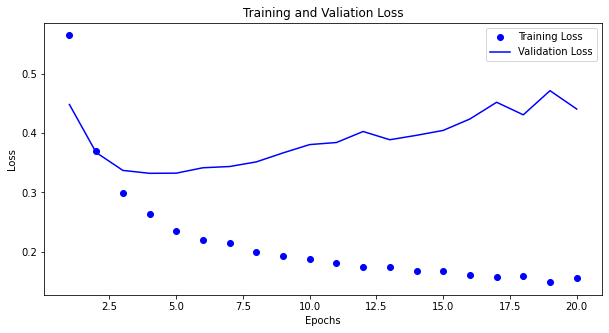

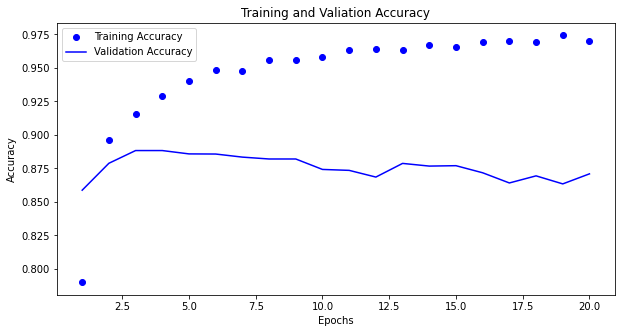

In [0]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(history_dict['acc'])+1)

plt.figure(figsize=(10,5))
plt.plot(epochs,loss_values,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Training and Valiation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.figure(figsize=(10,5))
plt.plot(epochs,acc_values,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation Accuracy')
plt.title('Training and Valiation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
##########################################################

In [0]:
#### We try chaning the hyperparameters

In [0]:
## 1 more hidden layer

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 125us/sample - loss: 0.5986 - acc: 0.6531 - val_loss: 0.5355 - val_acc: 0.7416
Epoch 2/4
15000/15000 [==============================] - 1s 81us/sample - loss: 0.4650 - acc: 0.8571 - val_loss: 0.4393 - val_acc: 0.8491
Epoch 3/4
15000/15000 [==============================] - 1s 81us/sample - loss: 0.3286 - acc: 0.9174 - val_loss: 0.3467 - val_acc: 0.8690
Epoch 4/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.3056 - acc: 0.8796


In [0]:
results

[0.3056329977893829, 0.87964]

In [0]:
## 1 less hidden layer

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 100us/sample - loss: 0.5182 - acc: 0.7952 - val_loss: 0.4091 - val_acc: 0.8667
Epoch 2/4
15000/15000 [==============================] - 1s 80us/sample - loss: 0.3373 - acc: 0.8991 - val_loss: 0.3316 - val_acc: 0.8839
Epoch 3/4
15000/15000 [==============================] - 1s 81us/sample - loss: 0.2607 - acc: 0.9207 - val_loss: 0.2966 - val_acc: 0.8908
Epoch 4/4
25000/25000 [==============================] - 2s 61us/sample - loss: 0.2966 - acc: 0.8851


In [0]:
results

[0.2965715758895874, 0.88508]

In [0]:
## More units

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 105us/sample - loss: 0.5071 - acc: 0.7911 - val_loss: 0.3773 - val_acc: 0.8748
Epoch 2/4
15000/15000 [==============================] - 1s 83us/sample - loss: 0.2999 - acc: 0.9023 - val_loss: 0.3172 - val_acc: 0.8713
Epoch 3/4
15000/15000 [==============================] - 1s 82us/sample - loss: 0.2195 - acc: 0.9259 - val_loss: 0.2777 - val_acc: 0.8901
Epoch 4/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.3152 - acc: 0.8728


[0.31524661536216736, 0.87284]

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 105us/sample - loss: 0.5226 - acc: 0.7819 - val_loss: 0.3762 - val_acc: 0.8706
Epoch 2/4
15000/15000 [==============================] - 1s 84us/sample - loss: 0.2924 - acc: 0.9003 - val_loss: 0.2921 - val_acc: 0.8881
Epoch 3/4
15000/15000 [==============================] - 1s 84us/sample - loss: 0.2060 - acc: 0.9291 - val_loss: 0.2813 - val_acc: 0.8880
Epoch 4/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.3589 - acc: 0.8558


[0.3589497530603409, 0.85584]

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1789 - acc: 0.7747 - val_loss: 0.1316 - val_acc: 0.8471
Epoch 2/4
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0957 - acc: 0.9037 - val_loss: 0.0956 - val_acc: 0.8881
Epoch 3/4
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0679 - acc: 0.9289 - val_loss: 0.0865 - val_acc: 0.8908
Epoch 4/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.0904 - acc: 0.8795


[0.09043933753013611, 0.87948]

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(partial_X_train,
          partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data=(X_val,y_val))

results = model.evaluate(X_test, y_test )
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 112us/sample - loss: 0.4591 - acc: 0.7958 - val_loss: 0.3203 - val_acc: 0.8795
Epoch 2/4
15000/15000 [==============================] - 1s 84us/sample - loss: 0.2360 - acc: 0.9119 - val_loss: 0.2994 - val_acc: 0.8790
Epoch 3/4
15000/15000 [==============================] - 1s 82us/sample - loss: 0.1660 - acc: 0.9379 - val_loss: 0.3013 - val_acc: 0.8834
Epoch 4/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.3412 - acc: 0.8732


[0.3411929008150101, 0.8732]

In [0]:
###### let's keep working on the model